# Book Rating Prediction Model

<b> Data </b> :

- GoodReads user info

- 12 attributes : 'bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'

- csv

<b> Goal </b> :

- predict book's rating : average_rating 

    a. Regression/continous : infinite per number
    
    b. classification (grp ratings)
    
    



# Libraries

In [404]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import chi2_contingency
import numpy as np
import plotly.express as px

#Encoding
from sklearn.preprocessing import LabelEncoder

#ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
import math
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


#Data Imbalance
import smogn


# Table of Contents


<b>I. Exploratory Analysis and Data Cleaning</b>

    I.a. Corrected error loading
    
    I.b. Dropped data (outliers)
    
    I.c. Grouped data
    

<b>II. Feature Engineering, Selection, and Encoding</b>

    II.a. Correlation
    
    II.b. Encoding (Label Encoder)
    
<b>III. Model Training and Evaluation</b>

    III.a. Regression
    
        III.a.1. Linear Regression
        
        III.a.2. Random Forest
        
        III.a.3. XGBoost
        
        Data Imbalance : SMOGN
        
    III.B. Classification
    
   
    
<b>IV. Conclusion and Perspective</b>
    

# I. Exploratory Analysis and Data Cleaning

- <b>`I.a. Corrected error loading`</b> : an error was encountered due to some author's values were moved to the other columns, this then generated for other values to not be in their respective colmuns and produced a 13th column without a label. This happened in 4 rows. To succesfully load the data, the last column was labeled error manually and the 4 rows with the values of authors shifted to the following columns generating a domino like shift were put back to their respective columns manually, the error column was then deleted 



- <b>`I.b. Dropped data (outliers)`</b> : 
Rows with num_page = 0 were droppred (76 values) , average_rating = 0 (26 values), aswell as the 2 Invalid publication dates were dropped. Another approach could be to research and input the correct number of pages and publication date.


- <b>`I.c. Grouped data`</b> :
The language english with different versions were grouped together

At the end we obtain a df with 11025 rows and 12 columns

# I.a.corrected error loading 

 <b> Problem in Loading Data </b>
 - error : 12th column without a header : I manually named it "error", the goal is to find these unexpected values

In [405]:
df_error = pd.read_csv(r'C:\Users\chinv\Desktop\MSc_DSTI_2325\2023_2024\PythonLabs_Hanna\books.csv', index_col='bookID') 
#I edited the books.csv by adding coulumn header error to succesfully load the data and inspect the unexpected values inisde

In [406]:
#pb 4 columns authors in 2 columns : formatted in excel 
df_error['error'].value_counts()

Harvard University Press       1
Cold Spring Press              1
Huntington House Publishers    1
Brown Son & Ferguson Ltd.      1
Name: error, dtype: int64

In [407]:
df_error[df_error['error']=='Brown Son & Ferguson Ltd.'] #pb with authors column

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,error
bookID,,,,,,,,,,,,
34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78085E+12,eng,49,0,0,05/01/1977,Brown Son & Ferguson Ltd.


In [408]:
df_error[df_error['error'].notnull()] #4 errors corrected manually (Column author)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,error
bookID,,,,,,,,,,,,
12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78067E+12,en-US,236,61,6,4/20/2004,Harvard University Press
16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78159E+12,eng,400,26,4,04/06/2004,Cold Spring Press
22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78156E+12,eng,342,38,4,1/15/1999,Huntington House Publishers
34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78085E+12,eng,49,0,0,05/01/1977,Brown Son & Ferguson Ltd.


<b>Corrected Data</b> 
- manually corrected in excel 

In [409]:
#data set after excel formatting manually (pd. 2 columns in authors)
df = pd.read_csv(r'C:\Users\chinv\Desktop\MSc_DSTI_2325\2023_2024\PythonLabs_Hanna\books_corrected.csv')
#handles french accents by default?

In [410]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,error
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/01/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12/01/1988,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,08/01/1993,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco,NaN


In [411]:
df.info() #no more value in error, no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  float64
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
 12  error               0 non-null      float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.1+ MB


In [412]:
df = df.drop('error', axis=1)

# I.b.dropped data (outliers)

In [413]:
df.isnull().sum() # no missing values

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [414]:
df.describe() #stats for numerical values

#outlier : num_pages = 0

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780590e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780870e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000


In [415]:
#remove num_pages white space:
df.rename(columns=lambda x:x.replace(" ", ""), inplace=True)

In [416]:
df_num_pages_0 = df[df['num_pages']==0]

df_num_pages_0['num_pages'].value_counts()

# 76 rows with 0 pages => drop / look for the pages online

0    76
Name: num_pages, dtype: int64

<AxesSubplot:>

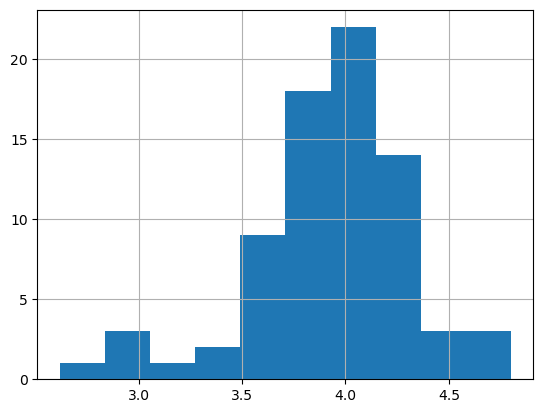

In [417]:
df_num_pages_0['average_rating'].hist() #could be interesting to look for those pages as we have an interesting distribution 

<b> drop columns </b> 

In [418]:
condition1 = df['num_pages'] == 0
df = df.drop(df[condition1].index)


In [419]:
df[df['num_pages'] == 0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


In [420]:
condition2 = df['average_rating'] == 0


df = df.drop(df[condition2].index)

In [421]:
df[df['average_rating'] == 0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


   <b>Convert Publication date to datetime</b>

In [422]:
#convert publication date to datetime

df['publication_date'] = pd.to_datetime(df['publication_date'], dayfirst=True, errors='coerce') # coerce : put Nat to invalid dates

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\51041276.py:3: UserWarning:

Parsing '10/21/2004' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\51041276.py:3: UserWarning:

Parsing '11/15/2004' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\51041276.py:3: UserWarning:

Parsing '12/14/2005' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\51041276.py:3: UserWarning:

Parsing '11/15/2002' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\51041276.py:3: UserWarning:

Parsing '10/16/2003' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



In [423]:
df[df['publication_date'].isna()] #2 invalid dates

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,553575104,9.780550e+12,eng,718,10608,295,NaT,Bantam Books
11098,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9.782070e+12,fre,640,15,2,NaT,Folio histoire


In [424]:
condition3 = df['publication_date'] == 'NaT'


df = df.drop(df[condition3].index)

In [425]:
df.shape

(11025, 12)

In [426]:
fig = px.histogram(df, x='average_rating', title='Histogram of average rating')
fig.show()

# I.c.grouped data

<b> group languages </b>

In [427]:
mapping = {'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}
df['language_code'] = df['language_code'].replace(mapping)


In [428]:
df['language_code'].value_counts()

eng    10444
spa      217
fre      143
ger       98
jpn       46
mul       19
zho       14
grc       10
por       10
ita        5
lat        3
enm        3
rus        2
swe        2
nl         1
ara        1
msa        1
glg        1
wel        1
nor        1
tur        1
gla        1
ale        1
Name: language_code, dtype: int64

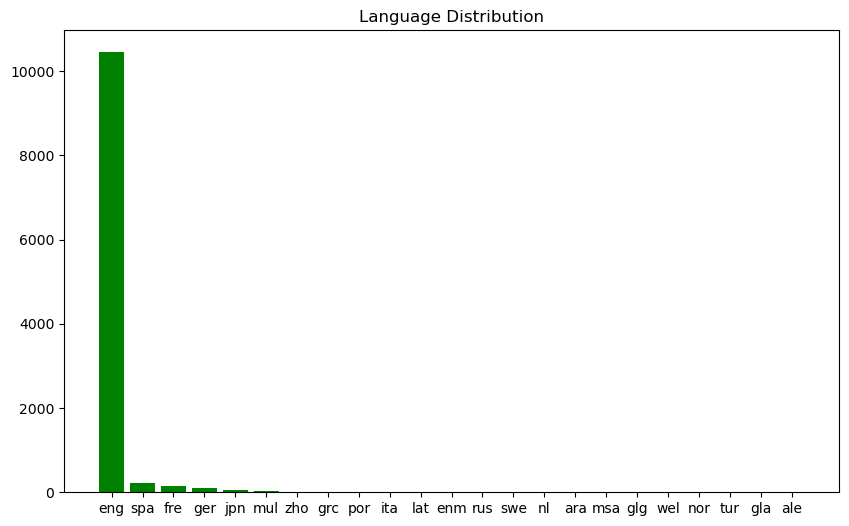

In [429]:
#bar plot
value_counts_language = df['language_code'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(value_counts_language.index, value_counts_language.values, color='green')
plt.title('Language Distribution')
plt.show()

#majority in eng

# II. Feature Engineering, Selection and Encoding

- <b>`II.a. Correlation`</b>
The correlation will give us information on columns with greatest relationship on our target value (average_rating)


- <b>`II.b. Encoding`</b>
This part ensures that the categorical coulumns are converted into numerical ones.
Label Encoding was used to minimize the computation as we are dealing with alot of sub categories notably the authors.



# II.a. Correlation

Correlation

Redundancy and The most correlated to the Target Value
- cat-cat : <b>Cramer's V</b>
- num -num : <b>Pearson</b> 

<b> a. Pearson</b>

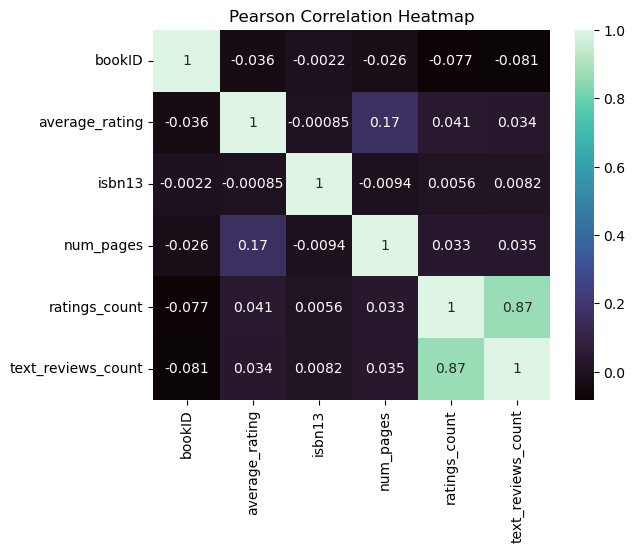

In [430]:
#Heatmap corr 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'mako')
plt.title("Pearson Correlation Heatmap")
plt.show()
#average_most correlated with num_pages

<b> b. Cramer's V</b> : remove redundancy between nominal cat variables

In [431]:
selected_columns = ['title', 'authors',  'isbn',
       'language_code', 'num_pages', 
       'publication_date', 'publisher']

In [432]:
df_cramer = df[selected_columns]

In [39]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corrected = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corrected = r - ((r - 1) ** 2) / (n - 1)
    k_corrected = k - ((k - 1) ** 2) / (n - 1)
    return (phi2_corrected / min((k_corrected - 1), (r_corrected - 1))) ** 0.5


In [40]:
# Create an empty DataFrame to store the Cramer's V values
cramer_v_matrix = pd.DataFrame(index=df_cramer.columns, columns=df_cramer.columns)

# Calculate Cramer's V for each pair of categorical variables
for col1 in df_cramer.columns:
    for col2 in df_cramer.columns:
        confusion_matrix = pd.crosstab(df_cramer[col1], df_cramer[col2])
        cramer_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Fill the diagonal with 1's (since the correlation with itself is always 1)
np.fill_diagonal(cramer_v_matrix.values, 1.0)

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\1986711394.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\1986711394.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\1986711394.py:9: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\1986711394.py:9: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\1986711394.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\1986711394.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\1986711394.py:9: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\chinv\AppData\Local\Temp\ipykernel_25052\1986711394.py:9: RuntimeWarning:

divide by

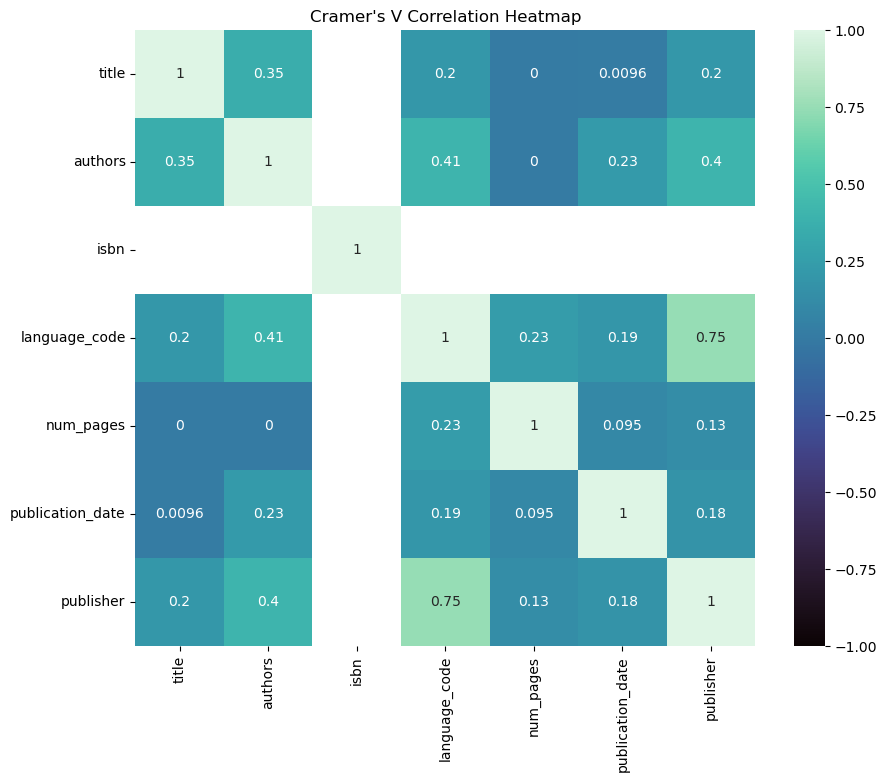

In [41]:
# Convert Cramer's V values to numeric format
cramer_v_matrix = cramer_v_matrix.astype(float)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_v_matrix, annot=True, cmap = 'mako', vmin=-1, vmax=1)
plt.title("Cramer's V Correlation Heatmap")
plt.show()



# II.b. Encoding

In [433]:
categorical_columns = df.select_dtypes(include=['object', 'datetime64']).columns.tolist()


In [434]:
categorical_columns


['title', 'authors', 'isbn', 'language_code', 'publication_date', 'publisher']

In [435]:
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [436]:
df_all = df

In [437]:
df_all.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,3046,2597,4.57,5894,9.780440e+12,2,652,2095690,27591,3270,1760
1,2,3047,2597,4.49,5840,9.780440e+12,2,870,2153167,29221,2626,1760
2,4,3044,2593,4.42,5866,9.780440e+12,2,352,6333,244,2411,1755
3,5,3049,2597,4.56,367,9.780440e+12,2,435,2339585,36325,2622,1760
4,8,3039,2597,4.78,5885,9.780440e+12,2,2690,41428,164,2794,1755


In [438]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11025 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11025 non-null  int64  
 1   title               11025 non-null  int32  
 2   authors             11025 non-null  int32  
 3   average_rating      11025 non-null  float64
 4   isbn                11025 non-null  int32  
 5   isbn13              11025 non-null  float64
 6   language_code       11025 non-null  int32  
 7   num_pages           11025 non-null  int64  
 8   ratings_count       11025 non-null  int64  
 9   text_reviews_count  11025 non-null  int64  
 10  publication_date    11025 non-null  int64  
 11  publisher           11025 non-null  int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 904.4 KB


In [439]:
df_all.set_index('bookID', inplace=True)

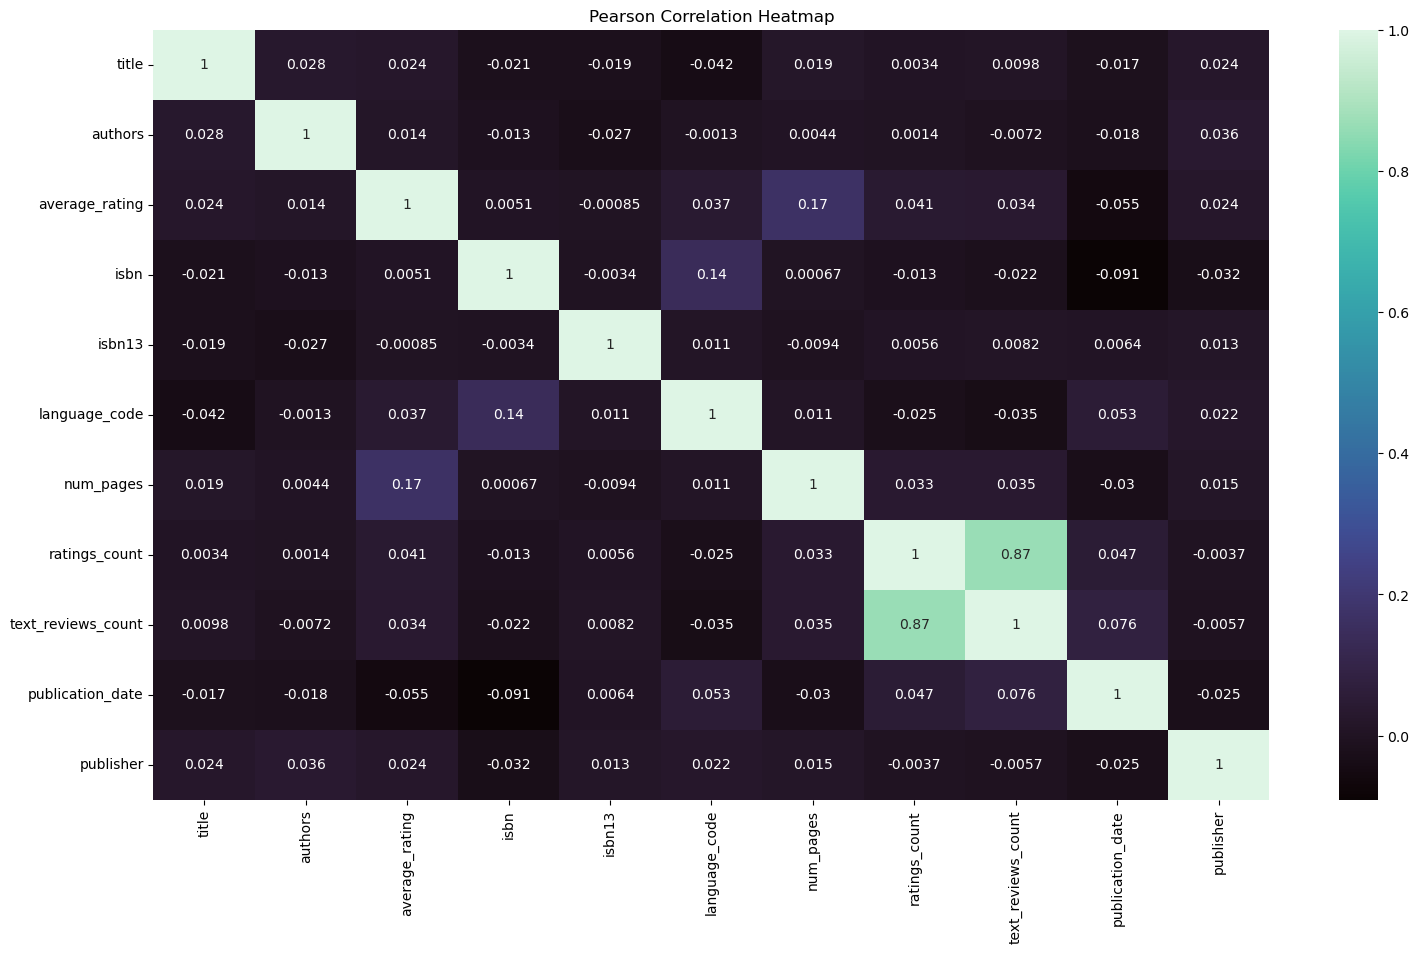

In [440]:
#Heatmap corr
corr_matrix = df_all.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'mako')

plt.title("Pearson Correlation Heatmap")
plt.show()

In [441]:
df_all.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

In [442]:
selected_columns = ['num_pages', 'average_rating', 'language_code', 'ratings_count'] 
df_selected = df_all[selected_columns]

selected due to important correlation with target value, other features were ommited to prevent redundancy such as ratings_count and text_reviews_counts with 0.87 correlation. Ratings_count was selected has it posses higher correlation than the other feature.

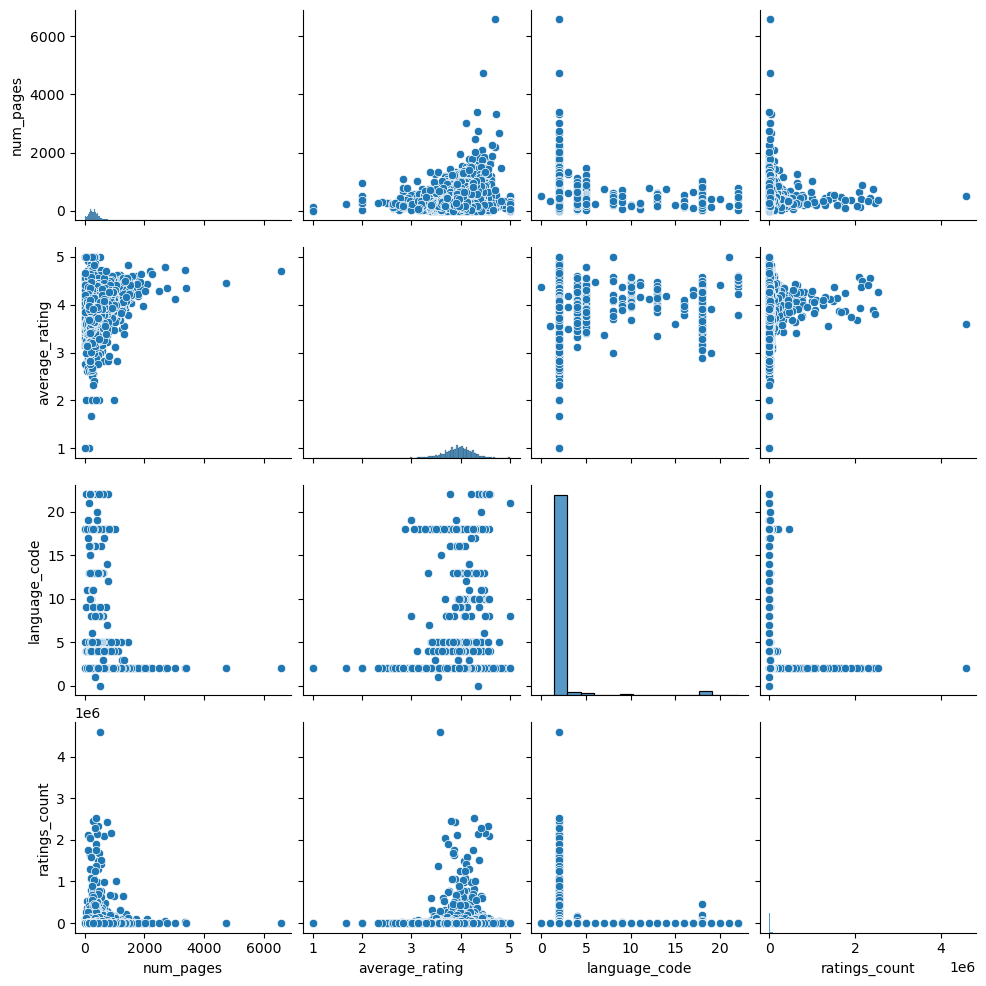

In [443]:
sns.pairplot(df_selected)

<AxesSubplot:xlabel='average_rating', ylabel='ratings_count'>

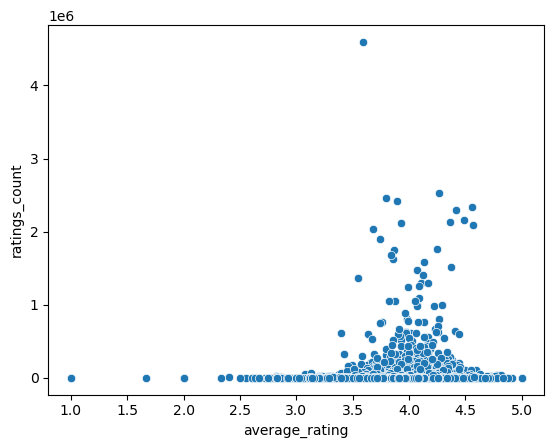

In [444]:
sns.scatterplot(x='average_rating', y='ratings_count', data=df_selected)

<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

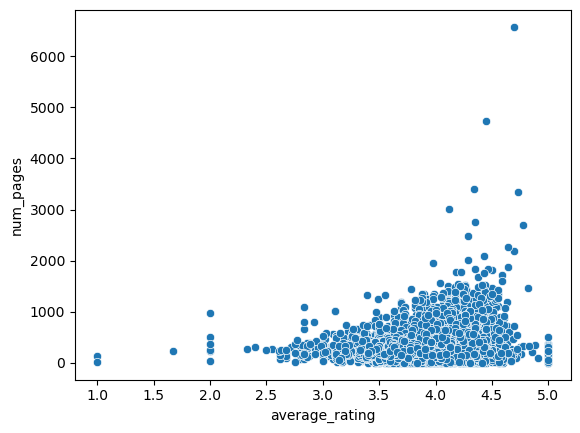

In [445]:
sns.scatterplot(x='average_rating', y='num_pages', data=df_selected)

In [446]:
# after inspecting the scatter plots above, we will remove the suspected outliers

# for the num_pages we will only work < 2000 and <1e6 for ratings_count
df_selected = df_selected[df_selected['num_pages'] < 2000]


df_selected = df_selected[df_selected['ratings_count'] < 1e6]

In [447]:
df_selected.corr() 

# we could see a slight increase in correlation between ratings_count and average_rating but a decrease with num_pages

,num_pages,average_rating,language_code,ratings_count
num_pages,1.000000,0.155995,0.014491,0.055138
average_rating,0.155995,1.000000,0.037886,0.053667
language_code,0.014491,0.037886,1.000000,-0.035301
ratings_count,0.055138,0.053667,-0.035301,1.000000


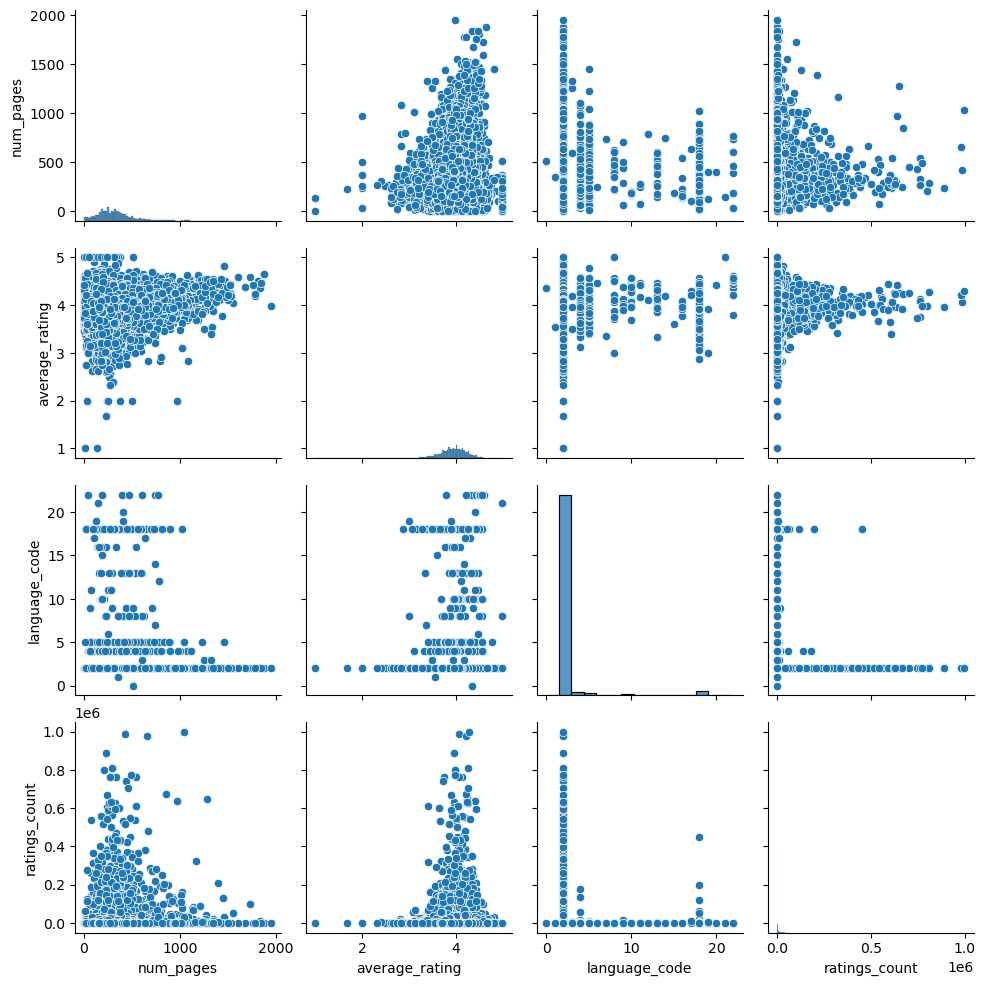

In [448]:
sns.pairplot(df_selected)

In [449]:
fig = px.histogram(df_selected, x='average_rating', title='Histogram of average rating after Cleaning')
fig.show()

# III. Model Training and Evaluation


- III.A. Regression
        
        III.A.1. Linear Regression
        
        III.A.2. Random Forest
        
        III.A.3. XGBoost
        
        Data Imbalance : SMOGN
        
- III.B. Classification



# III.A. Regression (Continous)

<b> Splitting Data </b>

In [544]:
y = df_selected['average_rating']

In [545]:
X = df_selected.drop(['average_rating'], axis = 1)

In [546]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [547]:
fig = px.histogram(y_train, x='average_rating', title='Histogram of average_rating y_train')
fig.show()

In [548]:
fig = px.histogram(y_test, x='average_rating', title='Histogram of average_rating y_test')
fig.show()

# III.A.1 Linear Regression

In [549]:
model = LinearRegression()

#Model Training
model.fit(X_train, y_train)

#Model Evaluation
y_pred_linear = model.predict(X_test)

# metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error (y_test, y_pred_linear)

print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)
print("mean_absolute_percentage_error", mape_linear)

Mean Squared Error: 0.08781762120477793
R-squared: 0.020711084507873623
mean_absolute_percentage_error 0.0586971374641417


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


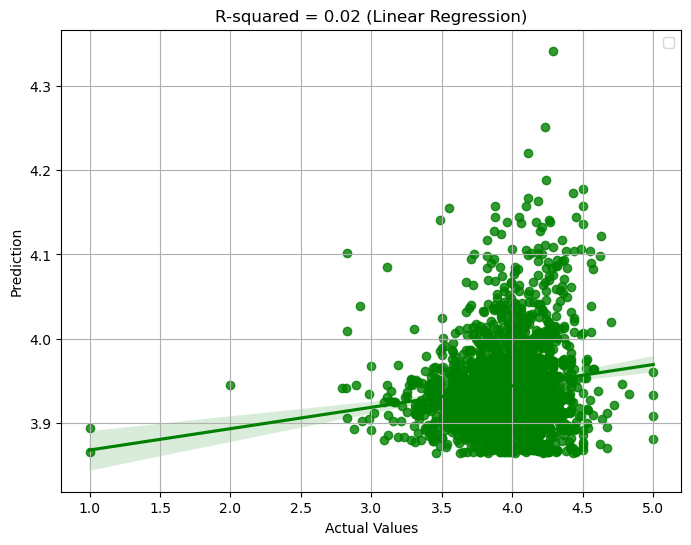

In [550]:
#R2 score plot, actual vs predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_linear, color='green')
plt.title(f'R-squared = {r2_linear:.2f} (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


# III.A.2 Random Forest

In [551]:

# Random Forest regression model
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
regressor_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf  = regressor_rf.predict(X_test)

# metrics
mse_rf = mean_squared_error(y_test, y_pred_rf )
r2_rf = r2_score(y_test, y_pred_rf )
mape_rf = mean_absolute_percentage_error (y_test, y_pred_rf)

print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)
print("mean_absolute_percentage_error", mape_rf)


Mean Squared Error: 0.09953777471623458
R-squared: -0.10998496788088286
mean_absolute_percentage_error 0.06302887359134741


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


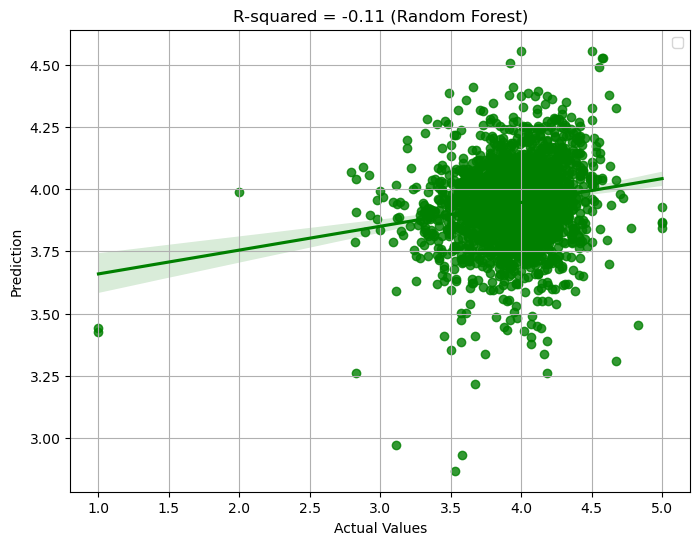

In [552]:
#R2 score plot, actual vs predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_rf, color='green')
plt.title(f'R-squared = {r2_rf:.2f} (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()


# XGBoost

In [459]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [553]:

# XGBoost regression model
regressor = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = regressor.predict(X_test)

#metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error (y_test, y_pred_xgb)

print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)
print("mean_absolute_percentage_error", mape_xgb)



Mean Squared Error: 0.08829210822895826
R-squared: 0.015419892638292798
mean_absolute_percentage_error 0.05921015852078832


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


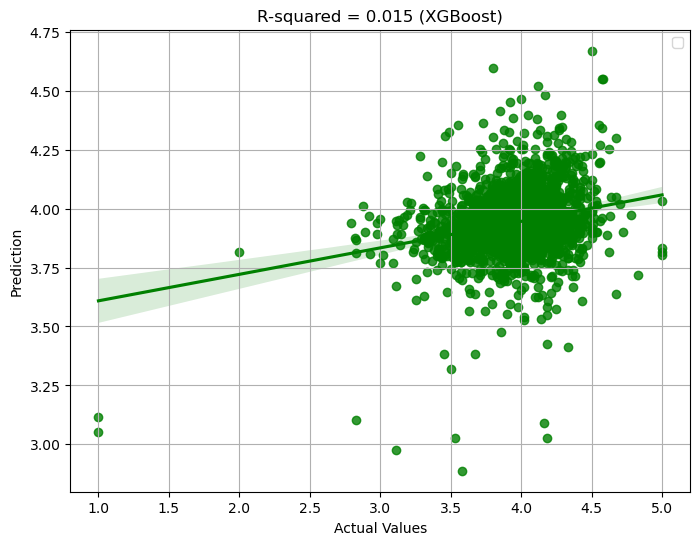

In [554]:
#R2 score plot, actual vs predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_xgb, color='green')
plt.title(f'R-squared = {r2_xgb:.3f} (XGBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Results Summary (Regression)


In [555]:

# Calculate evaluation metrics for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Method': ['Linear', 'RandomForest', 'XGBoost'],
    'Mean Squared Error': [mse_linear, mse_rf, mse_xgb],
    'R-squared': [r2_linear, r2_rf, r2_xgb],
    'Mean Absolute Percentage Error': [mape_linear, mape_rf, mape_xgb]
})

# Display the results DataFrame
results_df


,Method,Mean Squared Error,R-squared,Mean Absolute Percentage Error
0,Linear,0.087818,0.020711,0.058697
1,RandomForest,0.099538,-0.109985,0.063029
2,XGBoost,0.088292,0.015420,0.059210


# SMOGN : Data Imbalance

In [556]:
%pip install smogn

In [557]:
import smogn

In [558]:
train_df = pd.concat([X_train, y_train], axis=1)

In [559]:
train_df

,num_pages,language_code,ratings_count,average_rating
bookID,,,,
33869,232,2,66,3.77
933,497,2,4189,4.11
32499,400,2,340714,4.00
18879,483,2,7083,4.39
34179,936,2,38,3.85
...,...,...,...,...
21773,323,2,17,3.44
18963,478,2,1619,4.13
19677,640,2,14,3.75


In [560]:
train_df = train_df.reset_index()

In [561]:
train_df

,bookID,num_pages,language_code,ratings_count,average_rating
0,33869,232,2,66,3.77
1,933,497,2,4189,4.11
2,32499,400,2,340714,4.00
3,18879,483,2,7083,4.39
4,34179,936,2,38,3.85
...,...,...,...,...,...
8781,21773,323,2,17,3.44
8782,18963,478,2,1619,4.13
8783,19677,640,2,14,3.75
8784,2896,321,5,9674,4.02


In [562]:
## conduct smogn
train_df_smogn = smogn.smoter(
    
    data = train_df,  ## pandas dataframe
    y = 'average_rating'  ## string ('header name')
)
     

r_index: 100%|##########| 236/236 [00:00<00:00, 1415.19it/s]


In [563]:
train_df_smogn.shape

(10087, 5)

In [564]:
train_df.shape

(8786, 5)

In [565]:
fig = px.histogram(train_df_smogn, x='average_rating',  title='train_df_smogn_basic Histogram of average_rating ')
fig.show()

In [566]:
fig = px.histogram(train_df, x='average_rating',  title='train_df Histogram of average_rating')
fig.show()

# Results Summary with SMOGN (Regression)

In [567]:

train_df_smogn = train_df_smogn.set_index('bookID')

In [568]:
y_train_smogn = train_df_smogn['average_rating']

In [569]:
X_train_smogn = train_df_smogn.drop(['average_rating'], axis = 1)

In [573]:
#Models
model = LinearRegression()



#Linear Regression
#Model Training
model.fit(X_train_smogn, y_train_smogn)

#Model Evaluation
y_pred_smogn_linear = model.predict(X_test)

# metrics
mse_linear_smogn = mean_squared_error(y_test, y_pred_smogn_linear)
r2_linear_smogn = r2_score(y_test, y_pred_smogn_linear)
mape_linear_smogn = mean_absolute_percentage_error (y_test, y_pred_smogn_linear)

print("Mean Squared Error:", mse_linear_smogn)
print("R-squared:", r2_linear_smogn)
print("mean_absolute_percentage_error", mape_linear_smogn)



Mean Squared Error: 0.09723872200317318
R-squared: -0.08434732469326911
mean_absolute_percentage_error 0.06281624358570101


In [576]:
#Random Forest
# Random Forest regression model
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
regressor_rf.fit(X_train_smogn, y_train_smogn)

# Make predictions on the test set
y_pred_smogn_rf = regressor.predict(X_test)

# metrics
mse_rf_smogn = mean_squared_error(y_test, y_pred_smogn_rf)
r2_rf_smogn = r2_score(y_test, y_pred_smogn_rf)
mape_rf_smogn = mean_absolute_percentage_error (y_test, y_pred_smogn_rf)

print("Mean Squared Error:", mse_rf_smogn)
print("R-squared:", r2_rf_smogn)
print("mean_absolute_percentage_error", mape_rf_smogn)

Mean Squared Error: 0.08829210822895826
R-squared: 0.015419892638292798
mean_absolute_percentage_error 0.05921015852078832


In [578]:
#XGBoost
# XGBoost regression model
regressor = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X_train_smogn, y_train_smogn)

# Make predictions on the test set
y_pred_smogn_xgb = regressor.predict(X_test)

#metrics
mse_xgb_smogn = mean_squared_error(y_test, y_pred_smogn_xgb)
r2_xgb_smogn = r2_score(y_test, y_pred_smogn_xgb)
mape_xgb_smogn = mean_absolute_percentage_error (y_test, y_pred_smogn_xgb)


print("Mean Squared Error:", mse_xgb_smogn)
print("R-squared:", r2_xgb_smogn)
print("mean_absolute_percentage_error", mape_xgb_smogn)

Mean Squared Error: 0.12987161096012034
R-squared: -0.4482495347235844
mean_absolute_percentage_error 0.07030064053432894


In [580]:


# Create a DataFrame to store the results
results_df_smogn = pd.DataFrame({
    'Method': ['Linear', 'RandomForest', 'XGBoost'],
    'Mean Squared Error': [mse_linear_smogn, mse_rf_smogn, mse_xgb_smogn],
    'R-squared': [r2_linear_smogn, r2_rf_smogn, r2_xgb_smogn],
    'Mean Absolute Percentage Error': [mape_linear_smogn, mape_rf_smogn, mape_xgb_smogn]
})

# Display the results DataFrame
results_df_smogn


,Method,Mean Squared Error,R-squared,Mean Absolute Percentage Error
0,Linear,0.097239,-0.084347,0.062816
1,RandomForest,0.088292,0.015420,0.059210
2,XGBoost,0.129872,-0.448250,0.070301


 # III.B. Categorical
 
 - bad, average, good

In [367]:
X = df_selected.drop(['average_rating'], axis = 1)

In [369]:
y = df_selected['average_rating']

In [371]:
def map_to_class(value):
    if value >= 4:
        return "excellent"
    elif value >= 3:
        return "good"
    else:
        return "bad"

In [372]:
y = y.apply(map_to_class)
y = y.to_frame()


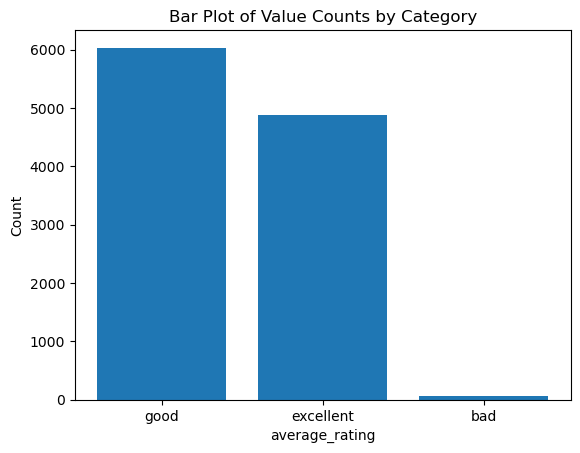

In [373]:
# Compute value counts
value_counts = y['average_rating'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('average_rating')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts by Category')
plt.show()

In [374]:
concatenated_df = pd.concat([X,y], axis=1)

In [375]:
concatenated_df.head()

,num_pages,language_code,ratings_count,average_rating
bookID,,,,
4,352,2,6333,excellent
9,152,2,19,good
12,815,2,3628,excellent
13,815,2,249558,excellent
14,215,2,4930,excellent


In [391]:
df_bad = concatenated_df[concatenated_df['average_rating'] == 'bad']

In [393]:
df_bad.head()

,num_pages,language_code,ratings_count,average_rating
bookID,,,,
159,360,2,411,bad
1584,80,2,5,bad
1658,664,2,0,bad
1856,196,2,9,bad
2019,96,2,3,bad


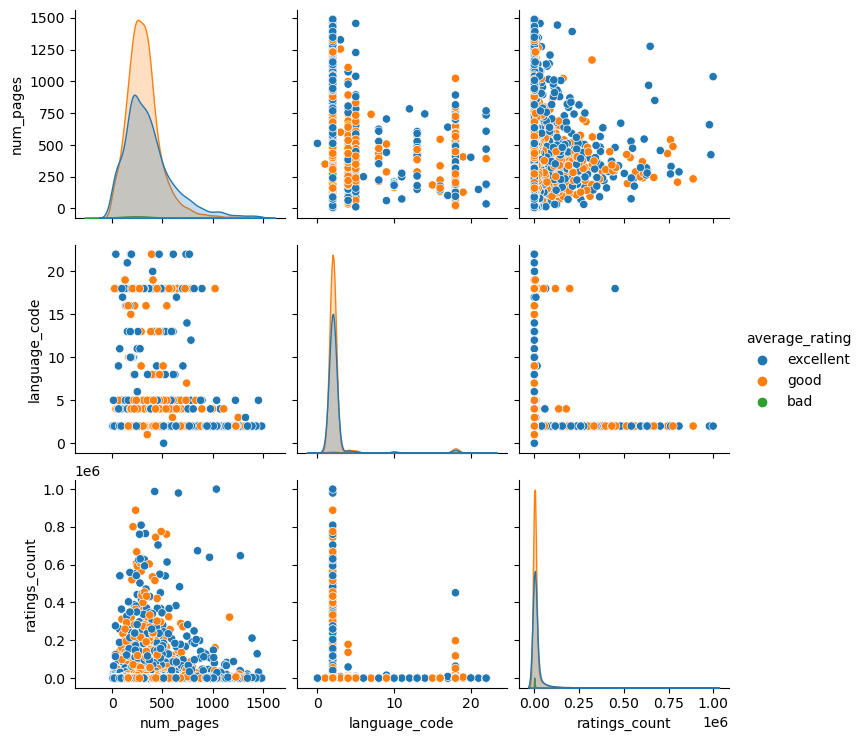

In [378]:
sns.pairplot(concatenated_df, hue="average_rating")

#We could see that there are no clear pattern of speration between the 3 classes, this could lower the model's accuracy. 

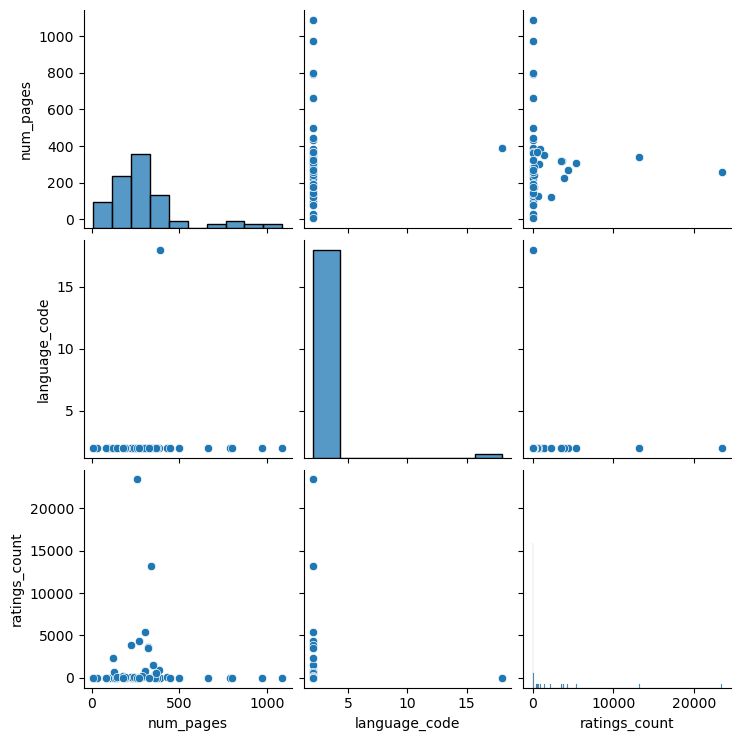

In [395]:
sns.pairplot(df_bad)

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


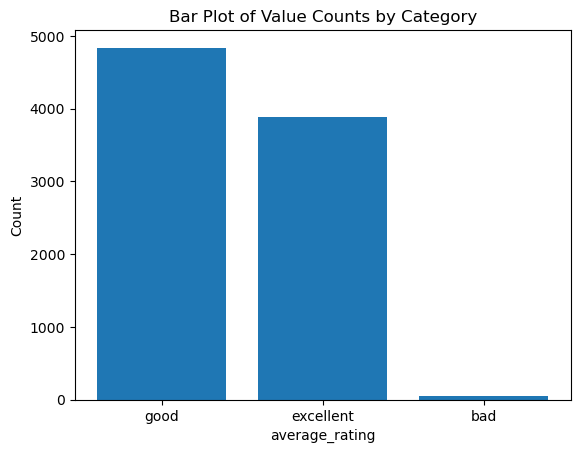

In [380]:
# Compute value counts
value_counts = y_train['average_rating'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('average_rating')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts by Category')
plt.show()

In [381]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [382]:

# Create a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from the grid search
best_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\chinv\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\chinv\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.602827177382581


In [383]:
y_test = y_test.values.flatten()

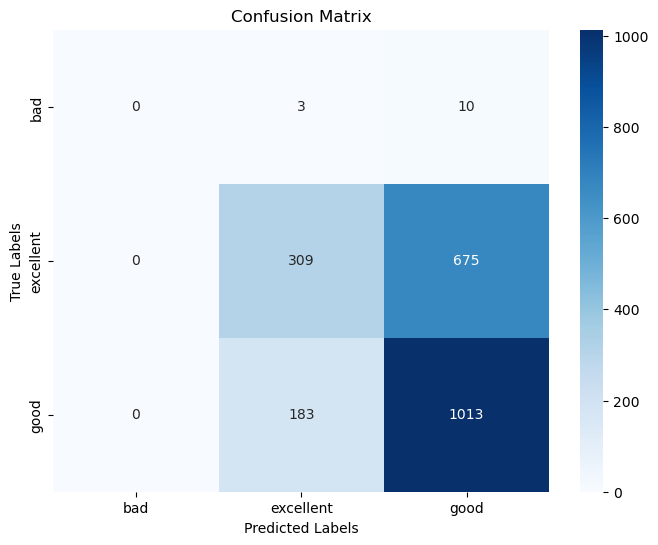

In [384]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get class labels from unique values in y_true and y_pred
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# IV. Conclusion and Perspective

We treated the book rating prediction as a regression and classification problem. Classification results yielded higher than the regression. Our features were not well correlated on the target variable where the highest is only at 0.17. To yield better results, other features such as book price, sales, etc. could be incorporated and inspected.